In [478]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, confusion_matrix
import youtokentome as yttm
from sklearn.manifold import TSNE
import umap

In [415]:
df = pd.read_csv("steam_dataset.csv")
df.head()

text  \
0  Эххх помню были времена, все началось в очень далеком уже 2003 году и первый запуск Half-Life в компьютерном клубе когда мы собирались с друзьями после школы и устраивали катки пять на пять в виде захвата флага или просто в режиме deathmatch и попутно осваивали тактику командной игры в Counter-Strike 1.0 (олды здесь ?) и наше время пролетало незаметно. После проходил через все выходы обновлений версий: 1.3, 1.4, 1.5, и само собой всеми известная Counter Strike 1.6, которая и является последней версией первой игры всеми любимого Counter-Strike в целом! Ведь тогда никто и не думал и даже не мог предположить что по выходу столь долгожданной Counter-Strike: Global Offensive обычная соревновательная игра перерастет во что-то большее и превратится в настоящий цирк, где читеры станут нормальным явлением, красивые текстуры на оружии будут являться неким высоким статусом, а обычные игроки превратятся в клоунов. Я конечно понимаю, что большинство игроков перед входом в эту игру не ставят перед собой каких-то конкретных целей, а просто приходят сюда отдохнуть и немного повеселиться, но то что происходит в игре сейчас это самый настоящий токсичный цирк. Хочется поделится своим мнением по данном проблематике...Игровой процесс:Хорошо вспоминается день релиза новой Counter-Strike: Global Offensive, я учился на четвертом курсе в институте и запомнил этот день хорошо. Тогда я уже более-менее освоил Steam как игровую платформу и в день релиза игры приобрел ее, к моему счастью, не начав в нее играть. Как я понял сейчас, оно было к лучшему, потому что многие из моих друзей кто начинал в то время свой путь в этой свалке, позже очень сильно пожалели об этом. На первом этапе жизни, обновленный соревновательный шутер представлял из себя легкую и достаточно приятную для глаз картинку. Казалось, что было взято все самое лучшее из предыдущих частей и улучшено, а также добавлено немного нового. Правда тогда я особо не обращал на это внимания, большинство карт были выучены как таблица умножения, а все окружающее вокруг меня выглядело слегка по-другому.Первое крупное обновление именуемое «Arms Deal» появилось в середине 2013 года, внесшее в игру коллекции с различными раскрасками для оружия. С этого дня принято считать, что всем привычная нам соревновательная, а главное классическая игра начала превращаться в клоунаду с микроплатежами. В течении последних лет CS:GO получала мелкие обновления в виде заплаток, обновления контента в виде пополнения предметов под раскраску, изменения интерфейса и даже собственный режим королевской битвы.Одним словом, внутри, игра осталась в том виде, в каком она была в день ее релиза и визуально практически не менялась. Весь добавляемый разработчиками контент, это так называемые спец операции с различными заданиями и пополнение арсенала кейсов с различными раскрасками. Ну и по уже сложившейся традиции эта игра сильно популярна в кибер спорте, от чего ее продвижение в обычной жизни постоянно поддерживается, привлекая новых игроков широкой рекламой и большой доступностью, ведь с недавних пор игра стала условно бесплатной. Во всем остальном игру поддерживает ее огромное игровое сообщество, контентом на YouTube, Twitch и ценами на торговой площадке для вещей.Как говориться. Пока вентиль крутиться – деньги мутятся!Для большинства игроков купить дорогую вещь в этой игре является чем-то престижным, показать на сколько он богат для широкой публики, для кого-то это уже настоящий способ заработка. Ну а корпорации зла Valve (сарказм) остается только купаться в зелени.Во всем остальном это типичный соревновательный, а главное командный шутер, где решает безусловно стрельба (прямые руки), тактика и слаженная работа ваших товарищей по команде. Все как в остальных подобных играх короче говоря, ничего нового здесь не скажешь.Что касается рейтингового режима или как его называют местные «ММ», то на данный момент он уже давно ушел от своего названия и сейчас это не больше чем битва читеров. Вообще Counter-Strike:GO эта игра, где счит

In [416]:
def fix_string(string: str) -> str:
    if isinstance(string, str):
        string = re.sub(r'[^а-яА-ЯёЁ\s]', '', string) 
        string = re.sub(r'[^\w\s]', ' ', string).lower()
        string = re.sub(r'\s+', ' ', string).strip()
    return string

In [417]:
df['text'] = df['text'].apply(fix_string)
df

text  \
0     эххх помню были времена все началось в очень далеком уже году и первый запуск в компьютерном клубе когда мы собирались с друзьями после школы и устраивали катки пять на пять в виде захвата флага или просто в режиме и попутно осваивали тактику командной игры в олды здесь и наше время пролетало незаметно после проходил через все выходы обновлений версий и само собой всеми известная которая и является последней версией первой игры всеми любимого в целом ведь тогда никто и не думал и даже не мог предположить что по выходу столь долгожданной обычная соревновательная игра перерастет во чтото большее и превратится в настоящий цирк где читеры станут нормальным явлением красивые текстуры на оружии будут являться неким высоким статусом а обычные игроки превратятся в клоунов я конечно понимаю что большинство игроков перед входом в эту игру не ставят перед собой какихто конкретных целей а просто приходят сюда отдохнуть и немного повеселиться но то что происходит в игре сейчас это самый настоящий токсичный цирк хочется поделится своим мнением по данном проблематикеигровой процессхорошо вспоминается день релиза новой я учился на четвертом курсе в институте и запомнил этот день хорошо тогда я уже болееменее освоил как игровую платформу и в день релиза игры приобрел ее к моему счастью не начав в нее играть как я понял сейчас оно было к лучшему потому что многие из моих друзей кто начинал в то время свой путь в этой свалке позже очень сильно пожалели об этом на первом этапе жизни обновленный соревновательный шутер представлял из себя легкую и достаточно приятную для глаз картинку казалось что было взято все самое лучшее из предыдущих частей и улучшено а также добавлено немного нового правда тогда я особо не обращал на это внимания большинство карт были выучены как таблица умножения а все окружающее вокруг меня выглядело слегка подругомупервое крупное обновление именуемое появилось в середине года внесшее в игру коллекции с различными раскрасками для оружия с этого дня принято считать что всем привычная нам соревновательная а главное классическая игра начала превращаться в клоунаду с микроплатежами в течении последних лет получала мелкие обновления в виде заплаток обновления контента в виде пополнения предметов под раскраску изменения интерфейса и даже собственный режим королевской битвыодним словом внутри игра осталась в том виде в каком она была в день ее релиза и визуально практически не менялась весь добавляемый разработчиками контент это так называемые спец операции с различными заданиями и пополнение арсенала кейсов с различными раскрасками ну и по уже сложившейся традиции эта игра сильно популярна в кибер спорте от чего ее продвижение в обычной жизни постоянно поддерживается привлекая новых игроков широкой рекламой и большой доступностью ведь с недавних пор игра стала условно бесплатной во всем остальном игру поддерживает ее огромное игровое сообщество контентом на и ценами на торговой площадке для вещейкак говориться пока вентиль крутиться деньги мутятсядля большинства игроков купить дорогую вещь в этой игре является чемто престижным показать на сколько он богат для широкой публики для когото это уже настоящий способ заработка ну а корпорации зла сарказм остается только купаться в зелениво всем остальном это типичный соревновательный а главное командный шутер где решает безусловно стрельба прямые руки тактика и слаженная работа ваших товарищей по команде все как в остальных подобных играх короче говоря ничего нового здесь не скажешьчто касается рейтингового режима или как его называют местные мм то на данный момент он уже давно ушел от своего названия и сейчас это не больше чем битва читеров вообще эта игра где считается нормальным поднять глобальный ранг с читами а потом красоваться перед всеми мол смотрите какой я профессионалкороче говоря спортивный интерес изза такого у многих пропадает и по этому проще побегать на каком ни будь паблике с хорошим администратором чем тратить свои нервные клетки которые кстати не восстан

In [418]:
def convert_rate(string: str) -> int:
    if 'Рекомендую' in string:
        return 1
    elif 'Не рекомендую' in string:
        return 0
    else:
        return -1

In [419]:
df['rate'] = df['rate'].apply(convert_rate)
df

text  \
0     эххх помню были времена все началось в очень далеком уже году и первый запуск в компьютерном клубе когда мы собирались с друзьями после школы и устраивали катки пять на пять в виде захвата флага или просто в режиме и попутно осваивали тактику командной игры в олды здесь и наше время пролетало незаметно после проходил через все выходы обновлений версий и само собой всеми известная которая и является последней версией первой игры всеми любимого в целом ведь тогда никто и не думал и даже не мог предположить что по выходу столь долгожданной обычная соревновательная игра перерастет во чтото большее и превратится в настоящий цирк где читеры станут нормальным явлением красивые текстуры на оружии будут являться неким высоким статусом а обычные игроки превратятся в клоунов я конечно понимаю что большинство игроков перед входом в эту игру не ставят перед собой какихто конкретных целей а просто приходят сюда отдохнуть и немного повеселиться но то что происходит в игре сейчас это самый настоящий токсичный цирк хочется поделится своим мнением по данном проблематикеигровой процессхорошо вспоминается день релиза новой я учился на четвертом курсе в институте и запомнил этот день хорошо тогда я уже болееменее освоил как игровую платформу и в день релиза игры приобрел ее к моему счастью не начав в нее играть как я понял сейчас оно было к лучшему потому что многие из моих друзей кто начинал в то время свой путь в этой свалке позже очень сильно пожалели об этом на первом этапе жизни обновленный соревновательный шутер представлял из себя легкую и достаточно приятную для глаз картинку казалось что было взято все самое лучшее из предыдущих частей и улучшено а также добавлено немного нового правда тогда я особо не обращал на это внимания большинство карт были выучены как таблица умножения а все окружающее вокруг меня выглядело слегка подругомупервое крупное обновление именуемое появилось в середине года внесшее в игру коллекции с различными раскрасками для оружия с этого дня принято считать что всем привычная нам соревновательная а главное классическая игра начала превращаться в клоунаду с микроплатежами в течении последних лет получала мелкие обновления в виде заплаток обновления контента в виде пополнения предметов под раскраску изменения интерфейса и даже собственный режим королевской битвыодним словом внутри игра осталась в том виде в каком она была в день ее релиза и визуально практически не менялась весь добавляемый разработчиками контент это так называемые спец операции с различными заданиями и пополнение арсенала кейсов с различными раскрасками ну и по уже сложившейся традиции эта игра сильно популярна в кибер спорте от чего ее продвижение в обычной жизни постоянно поддерживается привлекая новых игроков широкой рекламой и большой доступностью ведь с недавних пор игра стала условно бесплатной во всем остальном игру поддерживает ее огромное игровое сообщество контентом на и ценами на торговой площадке для вещейкак говориться пока вентиль крутиться деньги мутятсядля большинства игроков купить дорогую вещь в этой игре является чемто престижным показать на сколько он богат для широкой публики для когото это уже настоящий способ заработка ну а корпорации зла сарказм остается только купаться в зелениво всем остальном это типичный соревновательный а главное командный шутер где решает безусловно стрельба прямые руки тактика и слаженная работа ваших товарищей по команде все как в остальных подобных играх короче говоря ничего нового здесь не скажешьчто касается рейтингового режима или как его называют местные мм то на данный момент он уже давно ушел от своего названия и сейчас это не больше чем битва читеров вообще эта игра где считается нормальным поднять глобальный ранг с читами а потом красоваться перед всеми мол смотрите какой я профессионалкороче говоря спортивный интерес изза такого у многих пропадает и по этому проще побегать на каком ни будь паблике с хорошим администратором чем тратить свои нервные клетки которые кстати не восстан

In [420]:
num_nan = df['text'].isnull().sum()
print(f"Количество пропущенных значений в столбце 'text': {num_nan}")

Количество пропущенных значений в столбце 'text': 23


In [421]:
df = df.dropna(subset=['text'])

In [422]:
comms = df.text.tolist()
print(len(comms))
comms[:10]

3797


['эххх помню были времена все началось в очень далеком уже году и первый запуск в компьютерном клубе когда мы собирались с друзьями после школы и устраивали катки пять на пять в виде захвата флага или просто в режиме и попутно осваивали тактику командной игры в олды здесь и наше время пролетало незаметно после проходил через все выходы обновлений версий и само собой всеми известная которая и является последней версией первой игры всеми любимого в целом ведь тогда никто и не думал и даже не мог предположить что по выходу столь долгожданной обычная соревновательная игра перерастет во чтото большее и превратится в настоящий цирк где читеры станут нормальным явлением красивые текстуры на оружии будут являться неким высоким статусом а обычные игроки превратятся в клоунов я конечно понимаю что большинство игроков перед входом в эту игру не ставят перед собой какихто конкретных целей а просто приходят сюда отдохнуть и немного повеселиться но то что происходит в игре сейчас это самый настоящий

In [423]:
rus_alph = set(list('йцукенгшщзхъфывапролджэёячсмитьбю'))
def drop_not_letters(text: str) -> str:
    return ''.join([c for c in text if c in rus_alph or c == ' '])

df['text'] = df['text'].apply(drop_not_letters)

df = df[df['text'].str.strip().astype(bool)]

print(len(df))

3467


/var/folders/t5/pwn__ldx45s30tgp8m7_2x680000gn/T/ipykernel_91647/4069973735.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(drop_not_letters)


In [424]:
def merge_comms(comms: list[str]) -> str:
    return ' '.join(comms)
    
comms = df.text.tolist()

unique_words = merge_comms(comms).split(' ')
len(unique_words)

267126

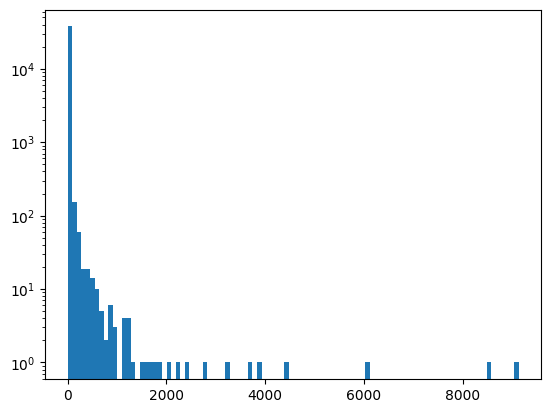

In [425]:
counts = Counter(merge_comms(comms).split())
freqs = list(counts.values())

plt.hist(freqs, bins=100)
plt.yscale('log')
plt.show()

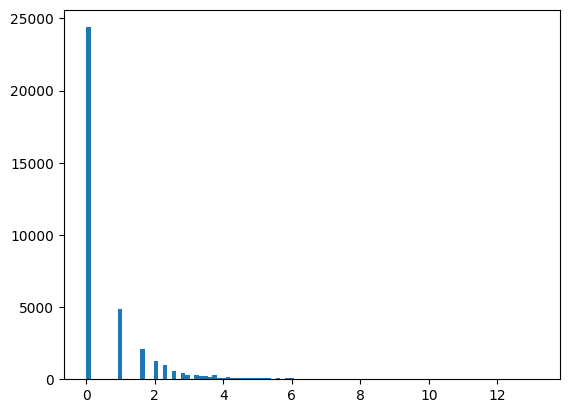

In [426]:
plt.hist(np.log2(freqs), bins=100)
plt.show()

In [427]:
words = counts.most_common(20000)
words = [word for word, freq in words]
words[:10]

['и', 'в', 'не', 'на', 'это', 'что', 'с', 'я', 'а', 'когда']

In [428]:
comms_tokenized = [comm.split() for comm in comms]
print(comms_tokenized[0])

['эххх', 'помню', 'были', 'времена', 'все', 'началось', 'в', 'очень', 'далеком', 'уже', 'году', 'и', 'первый', 'запуск', 'в', 'компьютерном', 'клубе', 'когда', 'мы', 'собирались', 'с', 'друзьями', 'после', 'школы', 'и', 'устраивали', 'катки', 'пять', 'на', 'пять', 'в', 'виде', 'захвата', 'флага', 'или', 'просто', 'в', 'режиме', 'и', 'попутно', 'осваивали', 'тактику', 'командной', 'игры', 'в', 'олды', 'здесь', 'и', 'наше', 'время', 'пролетало', 'незаметно', 'после', 'проходил', 'через', 'все', 'выходы', 'обновлений', 'версий', 'и', 'само', 'собой', 'всеми', 'известная', 'которая', 'и', 'является', 'последней', 'версией', 'первой', 'игры', 'всеми', 'любимого', 'в', 'целом', 'ведь', 'тогда', 'никто', 'и', 'не', 'думал', 'и', 'даже', 'не', 'мог', 'предположить', 'что', 'по', 'выходу', 'столь', 'долгожданной', 'обычная', 'соревновательная', 'игра', 'перерастет', 'во', 'чтото', 'большее', 'и', 'превратится', 'в', 'настоящий', 'цирк', 'где', 'читеры', 'станут', 'нормальным', 'явлением', 'крас

In [429]:
temp_file = "temp_corpus.txt"
with open(temp_file, "w", encoding="utf-8") as f:
    for tokens in comms_tokenized:
        f.write(" ".join(tokens) + "\n")

In [430]:
yttm.BPE.train(data=temp_file, vocab_size=5000, model="bpe_model.model")

Training parameters
  input: temp_corpus.txt
  model: bpe_model.model
  vocab_size: 5000
  n_threads: 8
  character_coverage: 1
  pad: 0
  unk: 1
  bos: 2
  eos: 3

reading file...
learning bpe...
number of unique characters in the training data: 33
number of deleted characters: 0
number of unique characters left: 33
id: 1000=247+732              freq: 137         subword: ▁подряд=▁под+ряд
id: 2000=1117+10              freq: 58          subword: ▁обязан=▁обяза+н
id: 3000=121+103              freq: 33          subword: ▁дома=▁до+ма
id: 4000=86+65                freq: 22          subword: ▁аль=▁а+ль
model saved to: bpe_model.model


In [431]:
bpe = yttm.BPE(model="bpe_model.model")
max_len = 300
def tokenize_and_pad(text, max_len):
    tokens = bpe.encode(text, output_type=yttm.OutputType.ID)
    if len(tokens) < max_len:
        return tokens + [0] * (max_len - len(tokens))
    return tokens[:max_len]

In [432]:
df['tokenized'] = df['text'].apply(lambda x: tokenize_and_pad(x, max_len))
X = np.array(df['tokenized'].tolist())
y = df['rate'].values

In [433]:
for i in range(5):
    print(f"Текст - {df['text'].iloc[i]}")
    print(f"Токены - {df['tokenized'].iloc[i]}")

Текст - эххх помню были времена все началось в очень далеком уже году и первый запуск в компьютерном клубе когда мы собирались с друзьями после школы и устраивали катки пять на пять в виде захвата флага или просто в режиме и попутно осваивали тактику командной игры в олды здесь и наше время пролетало незаметно после проходил через все выходы обновлений версий и само собой всеми известная которая и является последней версией первой игры всеми любимого в целом ведь тогда никто и не думал и даже не мог предположить что по выходу столь долгожданной обычная соревновательная игра перерастет во чтото большее и превратится в настоящий цирк где читеры станут нормальным явлением красивые текстуры на оружии будут являться неким высоким статусом а обычные игроки превратятся в клоунов я конечно понимаю что большинство игроков перед входом в эту игру не ставят перед собой какихто конкретных целей а просто приходят сюда отдохнуть и немного повеселиться но то что происходит в игре сейчас это самый нас

In [434]:
assert len(X) == len(y)

In [435]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Обучающая выборка: {X_train.shape[0]}")
print(f"Тестовая выборка: {X_test.shape[0]}")

Обучающая выборка: 2426
Тестовая выборка: 1041


In [436]:
class CommentDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.long)
        self.y = torch.tensor(y, dtype=torch.float32)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = CommentDataset(X_train, y_train)
test_dataset = CommentDataset(X_test, y_test)

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Батчи в обучающей выборке: {len(train_loader)}")
print(f"Батчи в тестовой выборке: {len(test_loader)}")

Батчи в обучающей выборке: 76
Батчи в тестовой выборке: 33


In [437]:
class Attention(nn.Module):
    def __init__(self, hidden_dim):
        super(Attention, self).__init__()
        self.attention = nn.Linear(hidden_dim * 2, 1) 
    
    def forward(self, lstm_out):
        attention_weights = torch.softmax(self.attention(lstm_out), dim=1)  
        attention_weights = attention_weights.transpose(1, 2)  
        weighted_sum = torch.bmm(attention_weights, lstm_out)  
        return weighted_sum.squeeze(1)  

In [438]:
class RNNTextClassificationModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, dropout, bidirectional=True):
        super(RNNTextClassificationModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.LSTM = nn.LSTM(embedding_dim, hidden_dim, batch_first=True, bidirectional=bidirectional)
        self.attention = Attention(hidden_dim)
        self.batch_norm = nn.BatchNorm1d(hidden_dim * 2)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x, return_embedding=False):
        embedded = self.embedding(x)
        lstm_out, _ = self.LSTM(embedded)
        attention_out = self.attention(lstm_out)
        attention_out = self.batch_norm(attention_out)
        attention_out = self.dropout(attention_out)
        if return_embedding:
            return attention_out
        out = self.fc(attention_out).squeeze(1)
        return out

In [446]:
vocab_size = 5000
embedding_dim = 100
hidden_dim = 128
output_dim = 1
dropout = 0.4

model = RNNTextClassificationModel(vocab_size, embedding_dim, hidden_dim, output_dim, dropout)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

num_negatives = (y_train == 0).sum()
num_positives = (y_train == 1).sum()
pos_weight = num_negatives / num_positives

criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor(pos_weight).to(device))
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)

print(model)

RNNTextClassificationModel(
  (embedding): Embedding(5000, 100)
  (LSTM): LSTM(100, 128, batch_first=True, bidirectional=True)
  (attention): Attention(
    (attention): Linear(in_features=256, out_features=1, bias=True)
  )
  (batch_norm): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (dropout): Dropout(p=0.4, inplace=False)
)


In [456]:
num_epochs = 20

train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(1, num_epochs + 1):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        preds = torch.sigmoid(outputs) >= 0.5
        correct += (preds == targets).sum().item()
        total += targets.size(0)
    
    train_accuracy = correct / total
    train_loss = total_loss / len(train_loader)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    
    model.eval()
    test_loss = 0
    correct_test = 0
    total_test = 0
    
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item()
            preds = torch.sigmoid(outputs) >= 0.5
            correct_test += (preds == targets).sum().item()
            total_test += targets.size(0)
    
    test_accuracy = correct_test / total_test
    test_loss = test_loss / len(test_loader)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    
    print(f'Epoch [{epoch}/{num_epochs}] '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f} | '
          f'Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.4f}')

Epoch [1/20] Train Loss: 0.5737, Train Acc: 0.5326 | Test Loss: 0.5567, Test Acc: 0.4419
Epoch [2/20] Train Loss: 0.5746, Train Acc: 0.5437 | Test Loss: 0.5578, Test Acc: 0.4409
Epoch [3/20] Train Loss: 0.5546, Train Acc: 0.5680 | Test Loss: 0.5404, Test Acc: 0.6004
Epoch [4/20] Train Loss: 0.5484, Train Acc: 0.5816 | Test Loss: 0.5464, Test Acc: 0.6206
Epoch [5/20] Train Loss: 0.5499, Train Acc: 0.5800 | Test Loss: 0.5417, Test Acc: 0.4774
Epoch [6/20] Train Loss: 0.5360, Train Acc: 0.6035 | Test Loss: 0.5188, Test Acc: 0.6378
Epoch [7/20] Train Loss: 0.5230, Train Acc: 0.6191 | Test Loss: 0.5154, Test Acc: 0.6503
Epoch [8/20] Train Loss: 0.5086, Train Acc: 0.6434 | Test Loss: 0.5136, Test Acc: 0.5706
Epoch [9/20] Train Loss: 0.4995, Train Acc: 0.6636 | Test Loss: 0.4970, Test Acc: 0.6667
Epoch [10/20] Train Loss: 0.4962, Train Acc: 0.6678 | Test Loss: 0.5003, Test Acc: 0.6724
Epoch [11/20] Train Loss: 0.4862, Train Acc: 0.6785 | Test Loss: 0.4890, Test Acc: 0.6782
Epoch [12/20] Train

In [457]:
model.eval()
all_preds = []
all_targets = []
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        preds = torch.sigmoid(outputs) >= 0.5
        all_preds.extend(preds.cpu().numpy())
        all_targets.extend(targets.cpu().numpy())

print(classification_report(all_targets, all_preds, digits=4))
print(confusion_matrix(all_targets, all_preds))

              precision    recall  f1-score   support

         0.0     0.6410    0.6288    0.6348       423
         1.0     0.7492    0.7589    0.7540       618

    accuracy                         0.7061      1041
   macro avg     0.6951    0.6939    0.6944      1041
weighted avg     0.7052    0.7061    0.7056      1041

[[266 157]
 [149 469]]


In [461]:
embeddings = []
model.eval()
with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        embedded = model(inputs, return_embedding=True).cpu().numpy()
        embeddings.extend(embedded)

embeddings = np.array(embeddings)


tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
tsne_embeddings = tsne.fit_transform(embeddings)

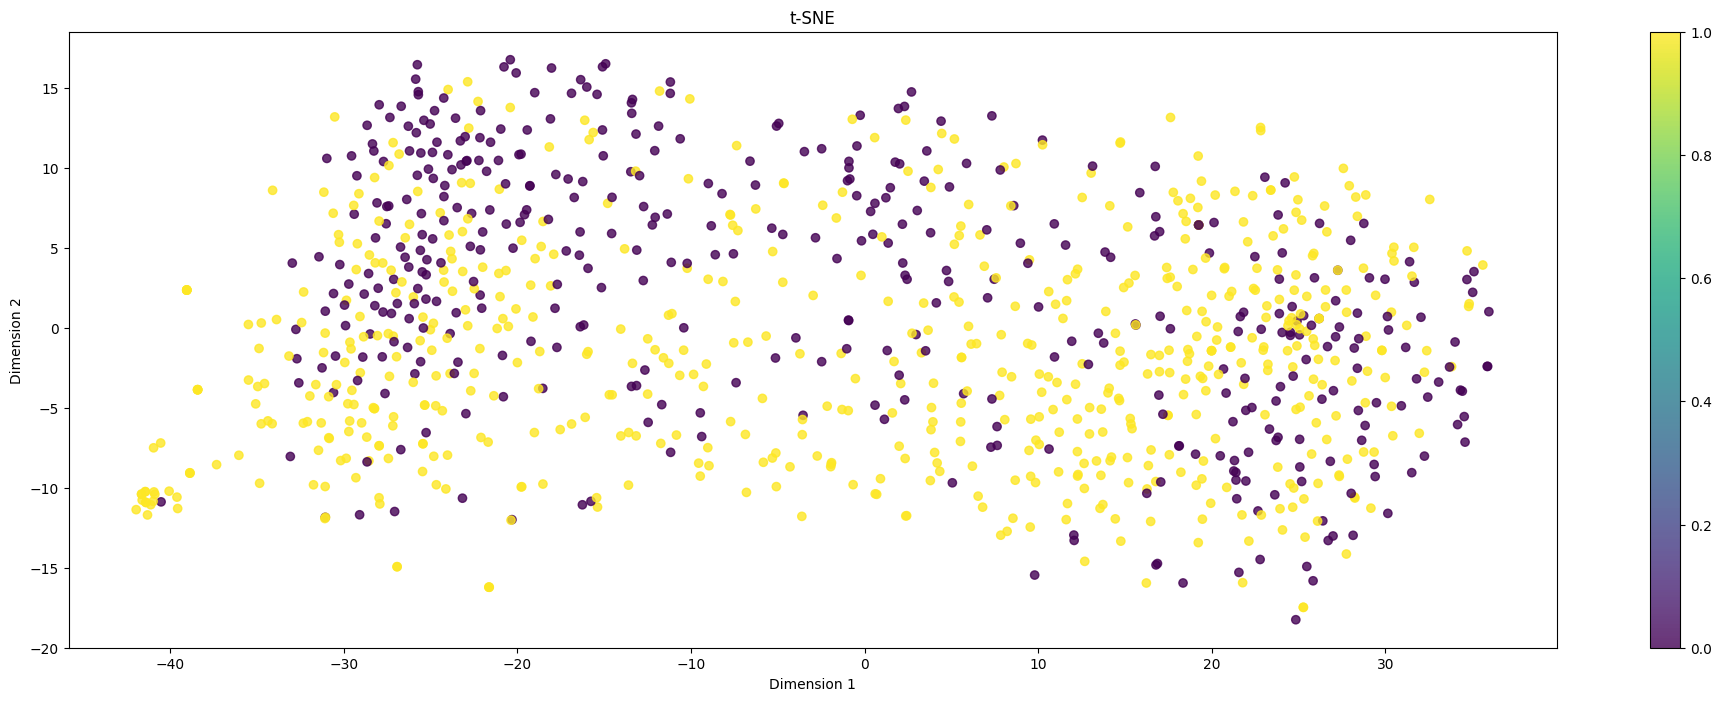

In [474]:
plt.figure(figsize=(24, 8))
scatter = plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=all_targets, alpha=0.8)
plt.colorbar(scatter)
plt.title("t-SNE")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

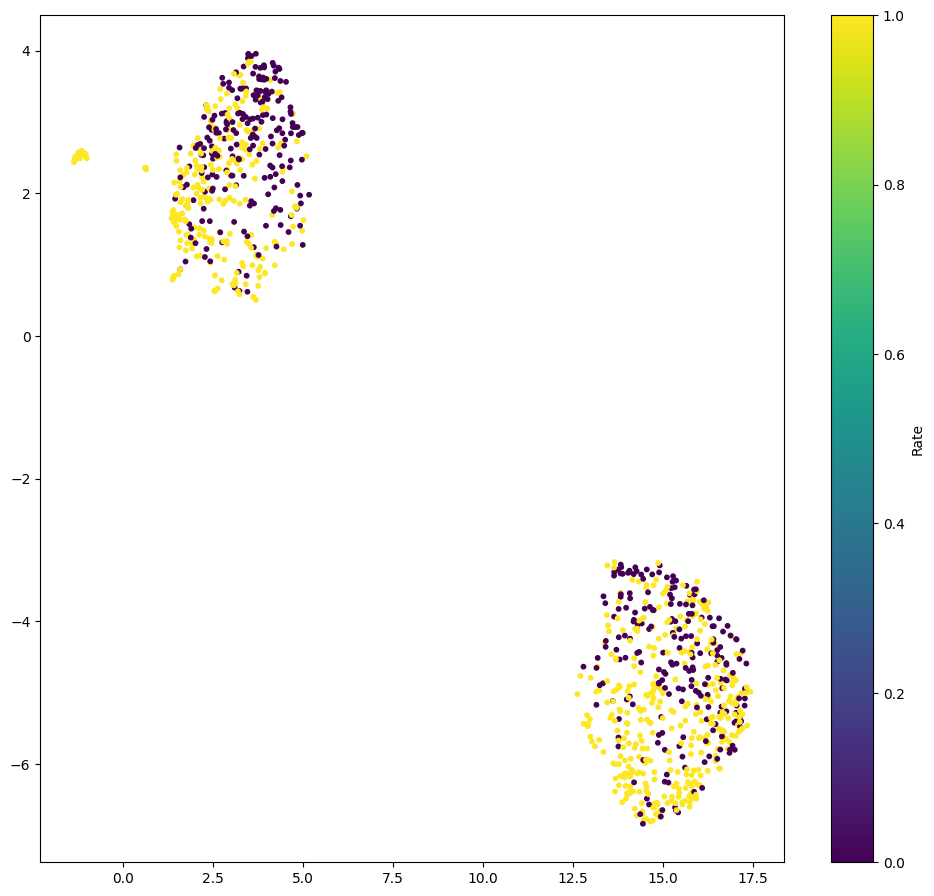

In [477]:
points = umap.UMAP(random_state=42).fit_transform(embeddings)
y = y_test
plt.figure(figsize=(12, 11))
scatter = plt.scatter(x=points[:, 0], y=points[:, 1], c=y, s=10)
plt.colorbar(scatter, label='Rate')